In [135]:
import numpy as np
import pandas as pd

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
## load the csv file
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Internship-TwiLearn/Projects/Google App Store Data Analysis/Google Apps data.csv')

In [138]:
df

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,8271,8912,FR Calculator,Family,4.0,7,2.6,500,Free,0.0,Others,"June 18, 2017",1.0.0,4.1,Education
8272,8272,8913,Sya9a Maroc - FR,Family,4.5,38,53.0,5000,Free,0.0,Others,"July 25, 2017",1.48,4.1,Education
8273,8273,8914,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6,100,Free,0.0,Others,"July 6, 2018",1.0,4.1,Education
8274,8274,8915,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,1.0,1000,Free,0.0,NaN,"January 19, 2015",Varies with device,-1,Books & Reference


In [139]:
# Data Understanding
print(df.head())  # View the first few rows of the dataset
print(df.info())  # Get information about the dataset, including column names and data types

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           5   
3             3           6   
4             4           7   

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  Art And Design     4.1   
1                                Coloring book moana  Art And Design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  Art And Design     4.7   
3                              Sketch - Draw & Paint  Art And Design     4.5   
4              Pixel Draw - Number Art Coloring Book  Art And Design     4.3   

   Reviews  Size  Installs  Type  Price Content Rating      Last Updated  \
0      159  19.0     10000  Free    0.0         Others   January 7, 2018   
1      967  14.0    500000  Free    0.0         Others  January 15, 2018   
2    87510   8.7   5000000  Free    0.0         Others    August 1, 2018   
3   215644  25.0  50000000  

In [140]:
# check for nan values in each columns

df.isna().sum()

Unnamed: 0.1             0
Unnamed: 0               0
App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64

In [141]:
# Check for duplicate rows in the dataset
print(df.duplicated().sum())

0


In [142]:
# Data Formatting
df['Last Updated'] = pd.to_datetime(df['Last Updated'])  # Convert 'Last Updated' column to datetime data type


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [144]:

# Assuming your DataFrame is named 'df'
# Splitting the dataset into two subsets: one with missing values and one without missing values
df_missing = df[df['Content Rating'].isnull()]
df_not_missing = df[~df['Content Rating'].isnull()]




In [145]:
# Selecting relevant features for prediction
features = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Last Updated', 'Current Ver', 'Minimum Android Ver', 'Genres']



In [146]:
# Splitting the data into input features (X) and the target variable (y)
X_train = df_not_missing[features]
y_train = df_not_missing['Content Rating']



In [147]:
# Encoding categorical features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include='object'))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [148]:
# Creating a Random Forest Classifier model
rf_classifier = RandomForestClassifier()



In [149]:
# Training the model
rf_classifier.fit(X_train_encoded, y_train)



RandomForestClassifier()

In [150]:
# Predicting the missing values
X_missing = df_missing[features]
X_missing_encoded = encoder.transform(X_missing.select_dtypes(include='object'))
predicted_ratings = rf_classifier.predict(X_missing_encoded)


In [151]:
# Assigning the predicted values to the missing entries in the DataFrame
df.loc[df['Content Rating'].isnull(), 'Content Rating'] = predicted_ratings

In [152]:
# check for nan values in each columns

df.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Last Updated           0
Current Ver            0
Minimum Android Ver    0
Genres                 0
dtype: int64

In [153]:
df

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,2018-01-07,1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,2018-01-15,2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,2018-08-01,1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,2018-06-20,1.1,4.4,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,8271,8912,FR Calculator,Family,4.0,7,2.6,500,Free,0.0,Others,2017-06-18,1.0.0,4.1,Education
8272,8272,8913,Sya9a Maroc - FR,Family,4.5,38,53.0,5000,Free,0.0,Others,2017-07-25,1.48,4.1,Education
8273,8273,8914,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6,100,Free,0.0,Others,2018-07-06,1.0,4.1,Education
8274,8274,8915,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,1.0,1000,Free,0.0,Others,2015-01-19,Varies with device,-1,Books & Reference


In [161]:
# Assuming your DataFrame is named 'df'
file_path = '/content/drive/MyDrive/Colab Notebooks/Data Science Internship-TwiLearn/Projects/Google App Store Data Analysis/Google Apps data Cleaned.csv'
df.to_csv(file_path, index=False)


Graphical Analysis

In [155]:
pip install squarify

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


App Categories

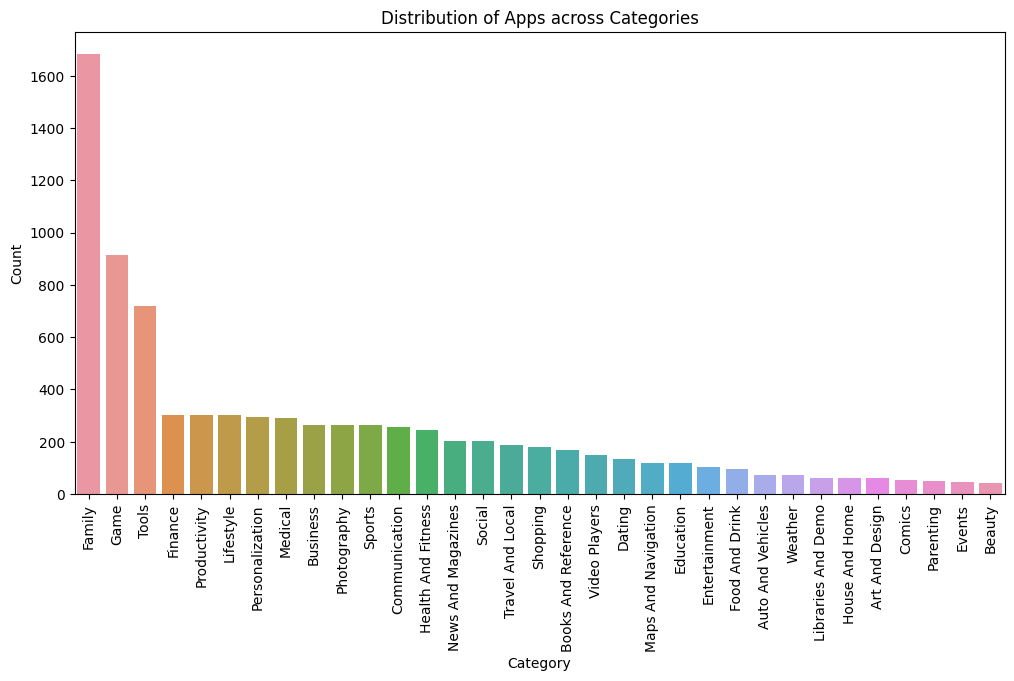

In [157]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=category_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Apps across Categories')
plt.show()


Pricing Analysis

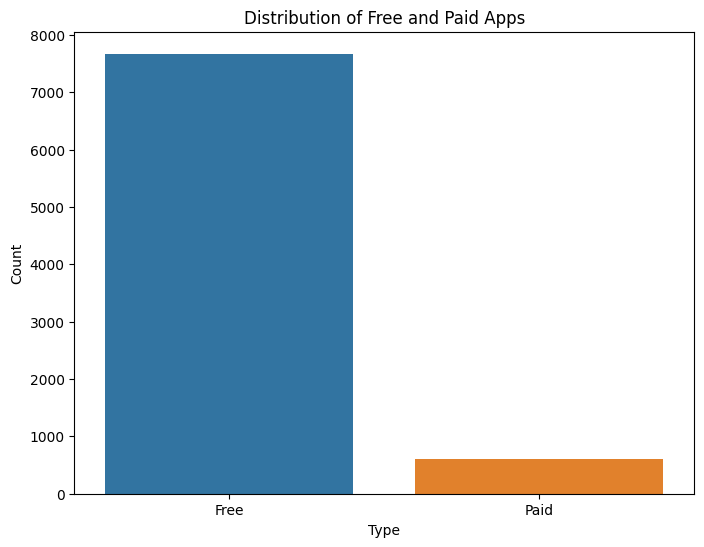

In [158]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Free and Paid Apps')
plt.show()


ZeroDivisionError: ignored

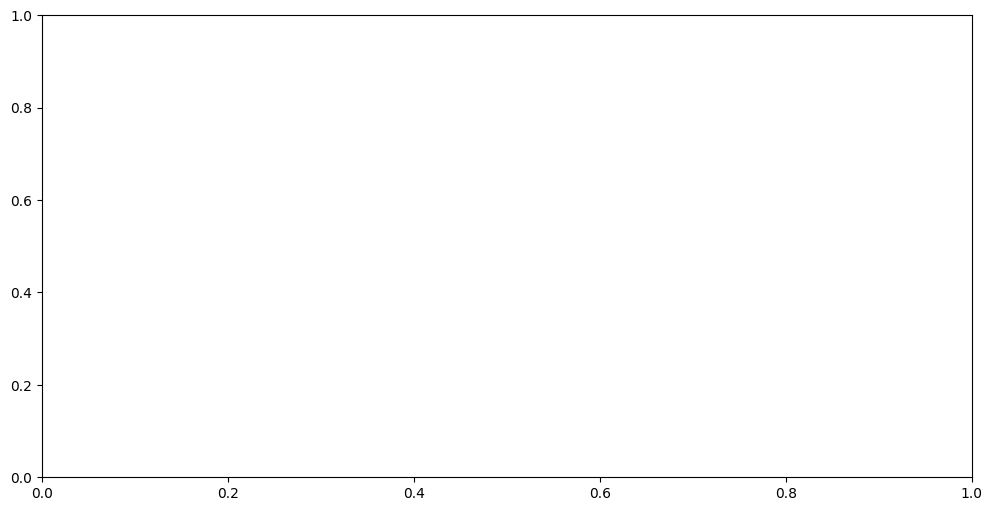

In [159]:

# Calculate the total price by category
category_price = df.groupby('Category')['Price'].sum().sort_values(ascending=False)

# Assign colors for TreeMap
cmap = plt.cm.RdYlGn
mini, maxi = min(category_price.values), max(category_price.values)
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in category_price.values]

# Create the TreeMap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=category_price.values, label=category_price.index, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Price Distribution across Categories (TreeMap)')
plt.show()